<a href="https://colab.research.google.com/github/greeshmaganji/uber-lyft-prices-prediction/blob/main/Uber-Lyft-prices-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import scipy
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving rideshare_kaggle.csv to rideshare_kaggle.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['rideshare_kaggle.csv']))

In [4]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [5]:
df.shape

(693071, 57)

In [6]:
#Total null values in every column
print(df.isnull().sum())

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [7]:
# Removing rows with missing values
df = df.dropna()

In [8]:
df.shape

(637976, 57)

<ipython-input-9-7499fe2a36fe>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


<Axes: >

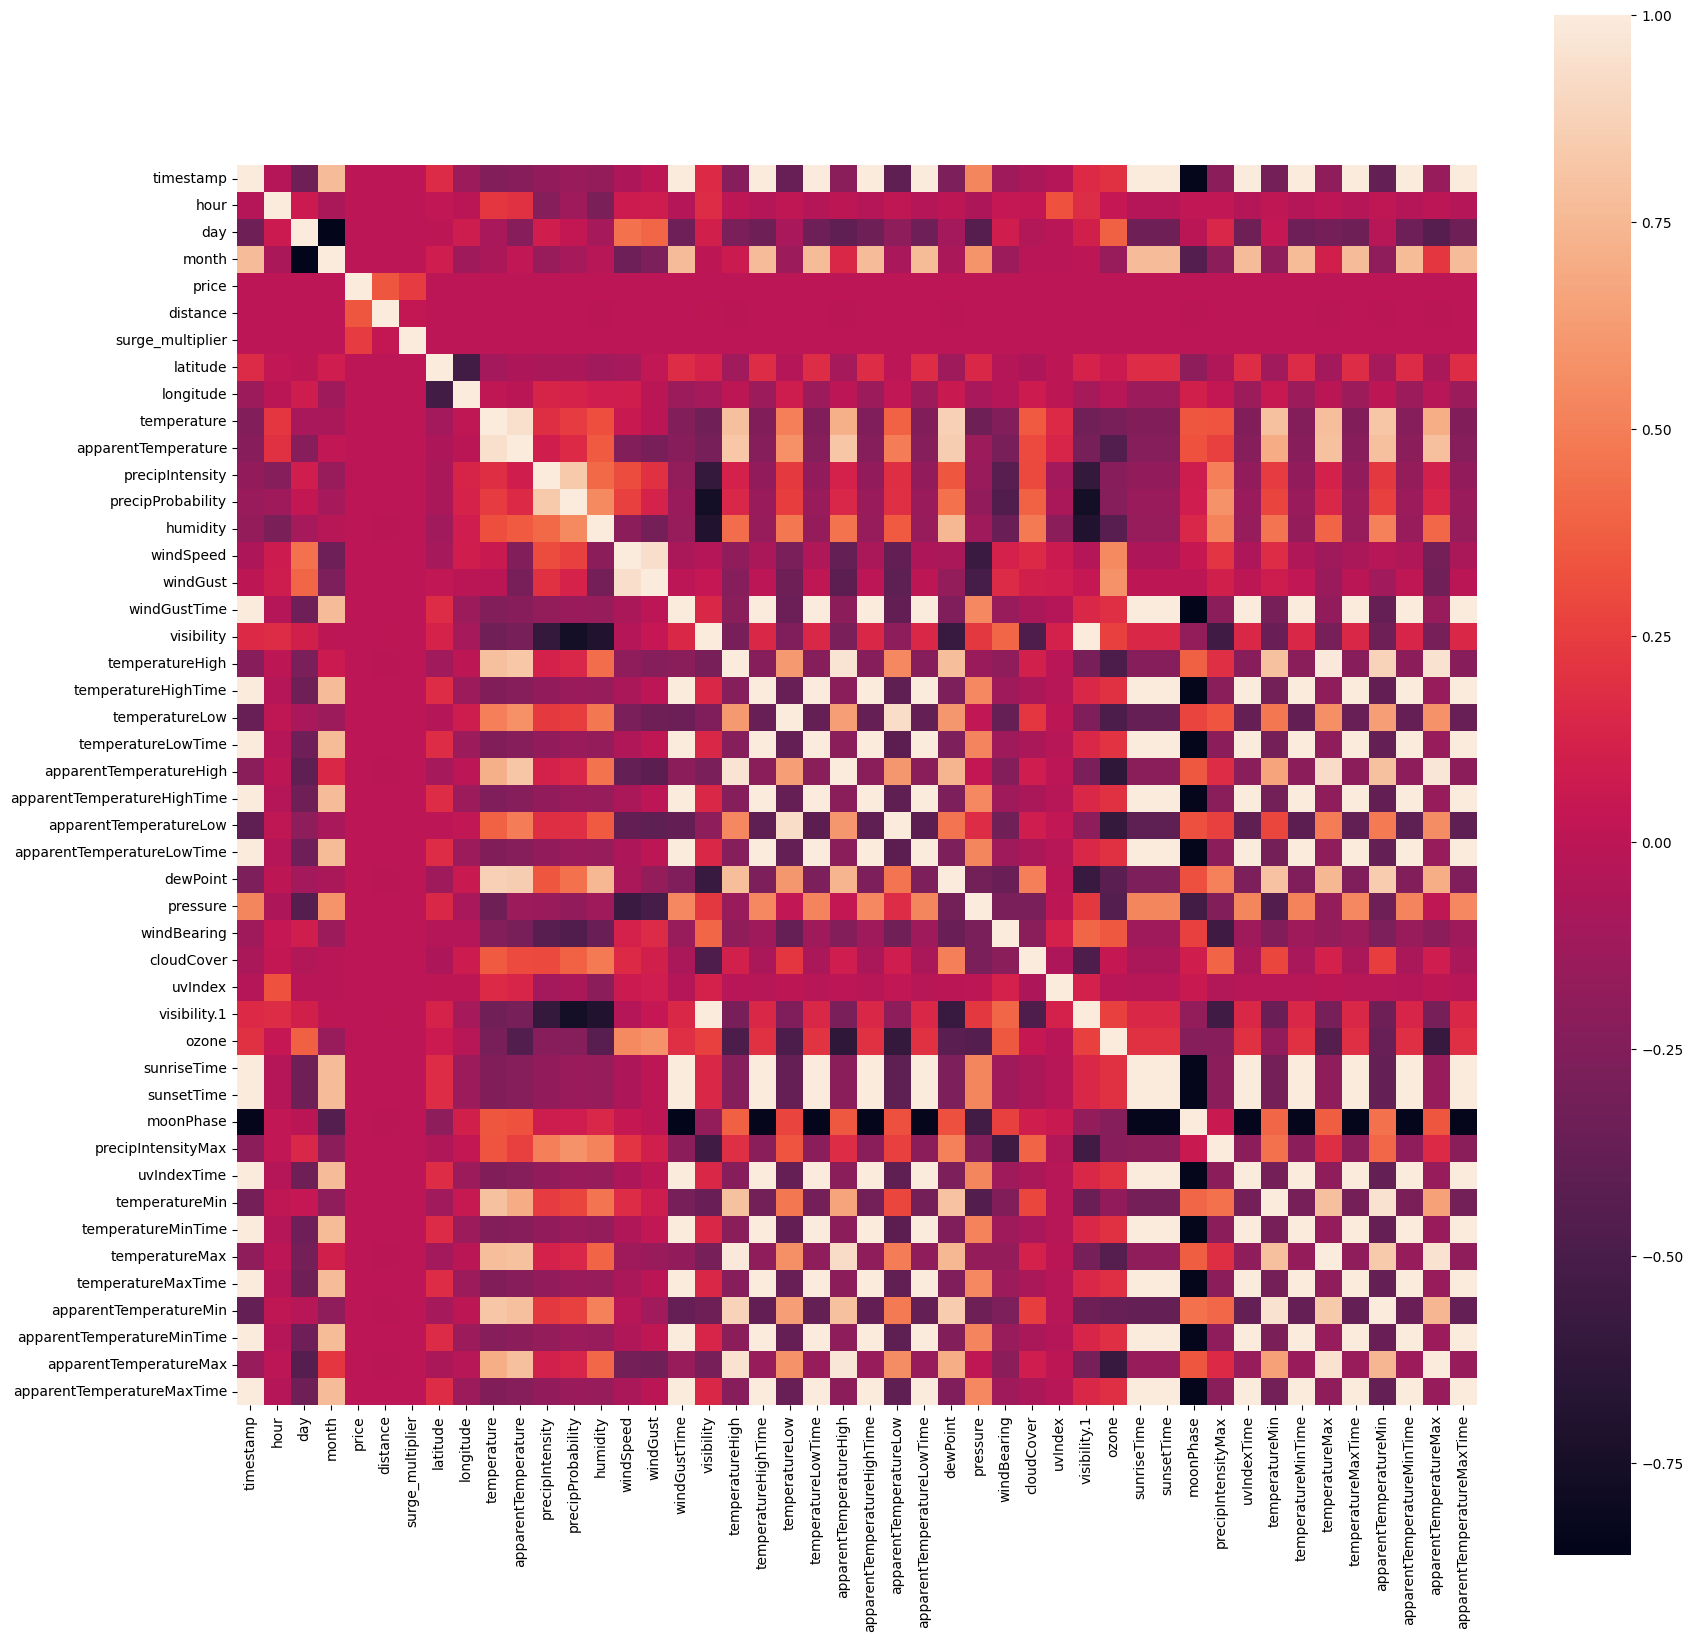

In [9]:
#correlation matrix

corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, square=True)

In [10]:
#from the correlation heat map we can remove all the unnecessary variable that has no correlations.

df.drop(df.columns[[0,1,5,6,10,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56]], axis=1, inplace=True)

In [11]:
# Filtering the Data to keep only "uber" and "lyft" values in the "cab_type" column

data = df[(df['cab_type'] == 'Uber') | (df['cab_type'] == 'Lyft')]

In [12]:
data.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,icon
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34,partly-cloudy-night
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58,rain
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33,clear-night
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,clear-night
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,partly-cloudy-night


This indicates that a significant portion of the taxis in New York City fall within the price range of \$5 to $20. There is a considerable demand for cab rides at these prices.

Text(0, 0.5, 'Number of Trips')

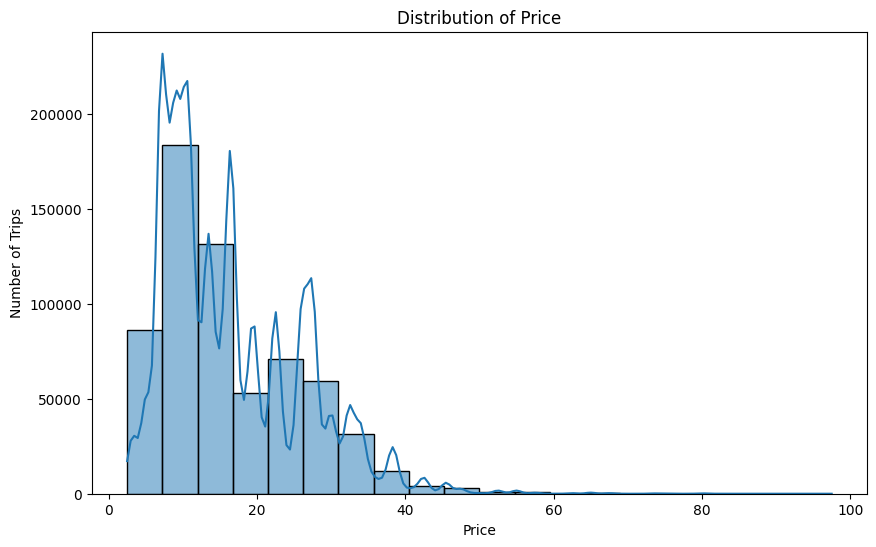

In [13]:
# Plot distribution of Price

fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
ax = sns.histplot(df['price'], bins=20, kde=True)
plt.title("Distribution of Price");
plt.xlabel('Price')
plt.ylabel('Number of Trips')

This suggests that the majority of taxis in New York City tend to travel distances of up to 3.5 to 4 miles from the city center. However, there are relatively fewer trips made for distances exceeding 4 miles.

Text(0, 0.5, 'Number of Trips')

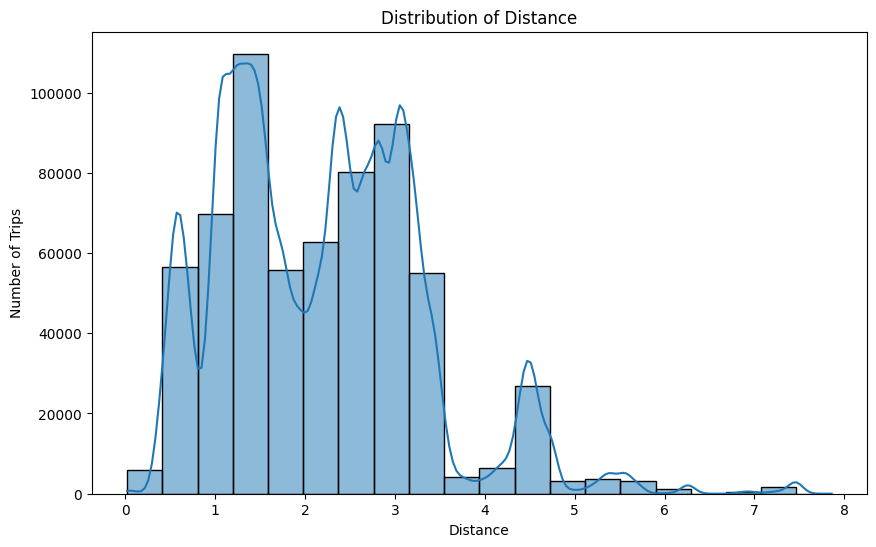

In [14]:
# Plot distribution of Distance
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
ax = sns.histplot(df['distance'], bins=20, kde=True)
plt.title("Distribution of Distance");
plt.xlabel('Distance')
plt.ylabel('Number of Trips')

Analyzing both diagrams, we can deduce that the longest cab journeys are frequently undertaken to and from Boston University, while the shortest trips typically originate from Haymarket Square.

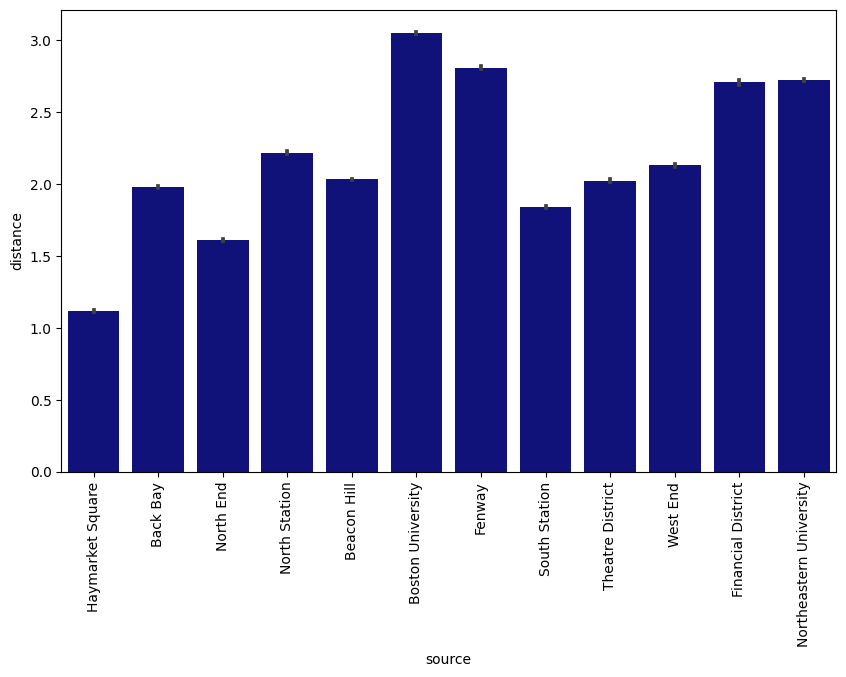

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x="source", y="distance", data=df, color="darkblue")
plt.xticks(rotation= 90)
plt.show()

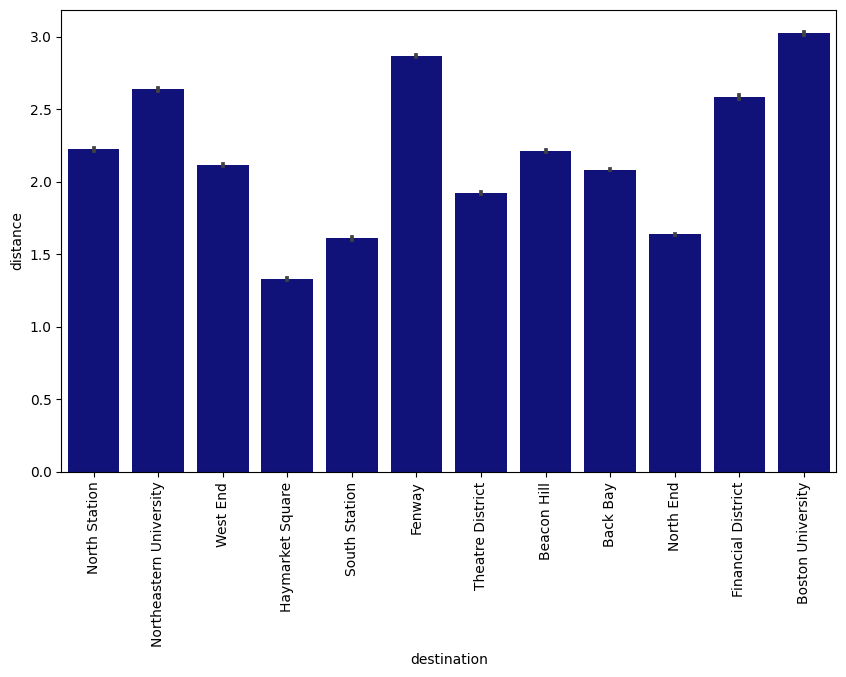

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x="destination", y="distance", data=df, color="darkblue")
plt.xticks(rotation= 90)
plt.show()

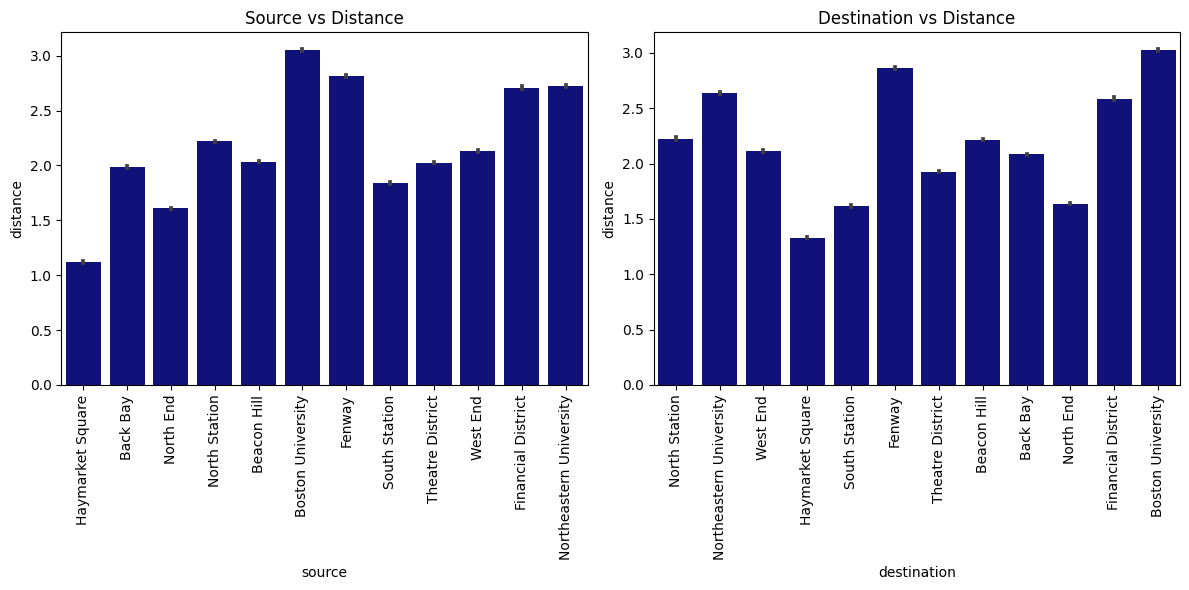

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first diagram
sns.barplot(x="source", y="distance", data=df, color="darkblue", ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
axs[0].set_title("Source vs Distance")

# Plot the second diagram
sns.barplot(x="destination", y="distance", data=df, color="darkblue", ax=axs[1])
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
axs[1].set_title("Destination vs Distance")

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

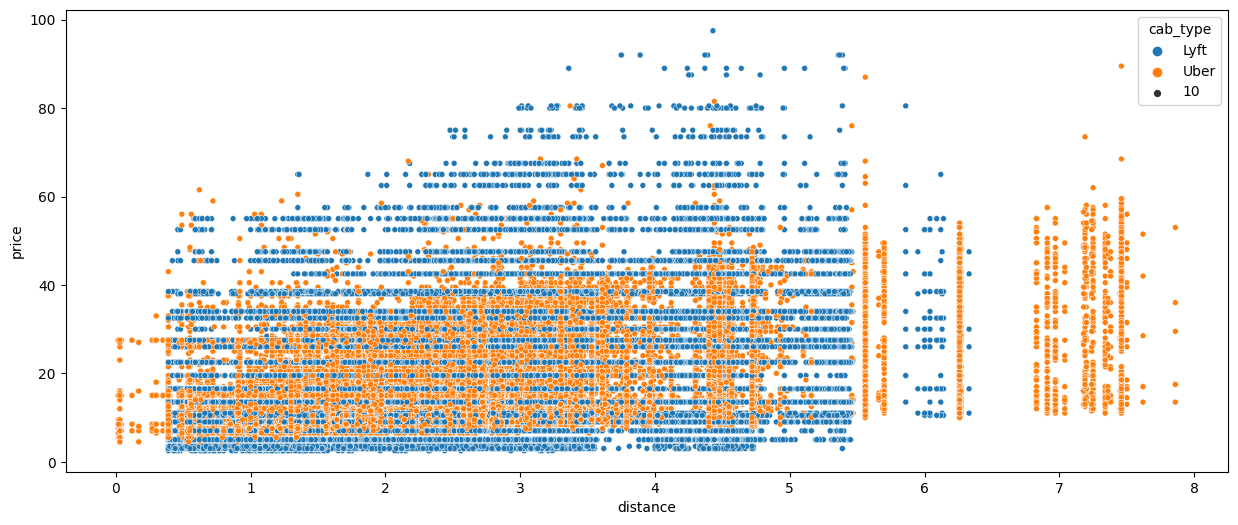

In [18]:
# we have ploted the dataset with respect to distance and price using seaborn scatterplot.
fig, ax = plt.subplots(figsize=(15, 6), dpi=100)
ax = sns.scatterplot(x="distance",
                    y="price",
                    data = data,
                    hue = "cab_type",
                    size = 10,
                    legend = 'brief')

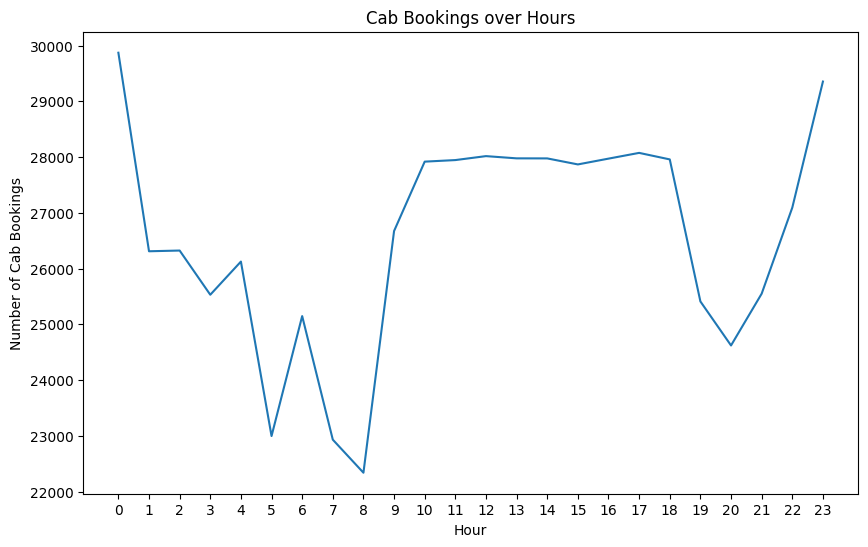

In [19]:
# Aggregate the data by hour and calculate the count of cab bookings
grouped_df = data.groupby('hour').size().reset_index(name='cab_bookings')

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='cab_bookings', data=grouped_df)
plt.xticks(range(24))
plt.xlabel('Hour')
plt.ylabel('Number of Cab Bookings')
plt.title('Cab Bookings over Hours')
plt.show()

  In below visualization, We can observe that there are constant number of booking regardless of temperature, but we can observe, there is rise in bookings when temperature is 35-45 degrees.

Text(0.5, 1.0, 'Temperature vs. Number of Bookings')

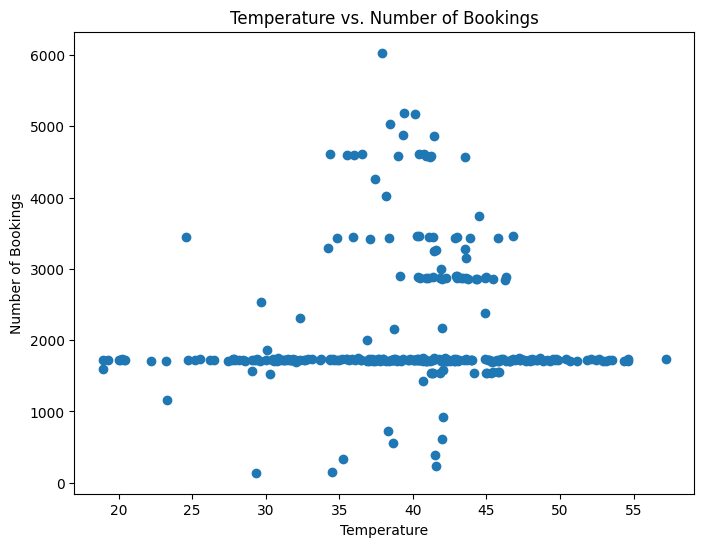

In [20]:
# Count the occurrences of each temperature value
temp_counts = data['temperature'].value_counts().reset_index()
temp_counts.columns = ['temperature', 'count']

plt.figure(figsize=(8, 6))
plt.scatter(temp_counts['temperature'], temp_counts['count'])
plt.xlabel('Temperature')
plt.ylabel('Number of Bookings')
plt.title('Temperature vs. Number of Bookings')

In [21]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode categorical columns using label encoding
data['source_encoded'] = encoder.fit_transform(data['source'])
data['destination_encoded'] = encoder.fit_transform(data['destination'])
data['cab_type_encoded'] = encoder.fit_transform(data['cab_type'])
data['name_encoded'] = encoder.fit_transform(data['name'])
data['icon_encoded'] = encoder.fit_transform(data['icon'])

data.drop(['source', 'destination', 'cab_type', 'name', 'icon'], axis=1, inplace=True)

data.head()


,hour,day,month,price,distance,surge_multiplier,temperature,source_encoded,destination_encoded,cab_type_encoded,name_encoded,icon_encoded
0,9,16,12,5.0,0.44,1.0,42.34,5,7,0,7,5
1,2,27,11,11.0,0.44,1.0,43.58,5,7,0,2,6
2,1,28,11,7.0,0.44,1.0,38.33,5,7,0,5,1
3,4,30,11,26.0,0.44,1.0,34.38,5,7,0,4,1
4,3,29,11,9.0,0.44,1.0,37.44,5,7,0,6,5


*Feature Scaling*

In [22]:
from sklearn.preprocessing import StandardScaler

# Select the numerical features for scaling
numerical_features = ['hour', 'day', 'month', 'distance', 'surge_multiplier', 'temperature']

# Create a new DataFrame with only the numerical features
numerical_data = data[numerical_features]

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the numerical data
scaler.fit(numerical_data)

# Transform the numerical data
scaled_data = scaler.transform(numerical_data)

# Replace the original numerical columns with the scaled values
data[numerical_features] = scaled_data


In [23]:
# Select the features and target variable
features = data.drop('price', axis=1)
target = data['price']



In [24]:
#Splitting the test and train dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Linear Regression Model

- First we fit tthe training data into Linear regression
- Make prediction for the test data
- Evaluate the model performance by calculating Mean Squared Error

In [25]:
# Fit the model to the training data
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Making predictions on the test data
y_pred = model.predict(X_test)

In [27]:
# Evaluating the model

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

42.11801583125568